<a href="https://colab.research.google.com/github/NadjaNovicic/Masinsko-ucenje/blob/main/Vezbanje27_02_logisticka_i_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import random

In [ ]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
data=data.replace('Female',0)
data=data.replace('Male',1)
data=data.replace('No',0)
data=data.replace('Yes',1)
data=data.replace('Negative',0)
data=data.replace('Positive',1)
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
import seaborn as sns
cor = data.corr().iloc[-1]
display(cor)


Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64

In [ ]:
data.drop(columns=["Age", "muscle stiffness", "Genital thrush", "Itching", "Obesity"], inplace=True)
data.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,delayed healing,partial paresis,Alopecia,class
0,1,0,1,0,1,0,0,0,1,0,1,1
1,1,0,0,0,1,0,1,0,0,1,1,1
2,1,1,0,0,1,1,0,0,1,0,1,1
3,1,0,0,1,1,1,0,0,1,0,0,1
4,1,1,1,1,1,1,1,1,1,1,1,1


<Axes: >

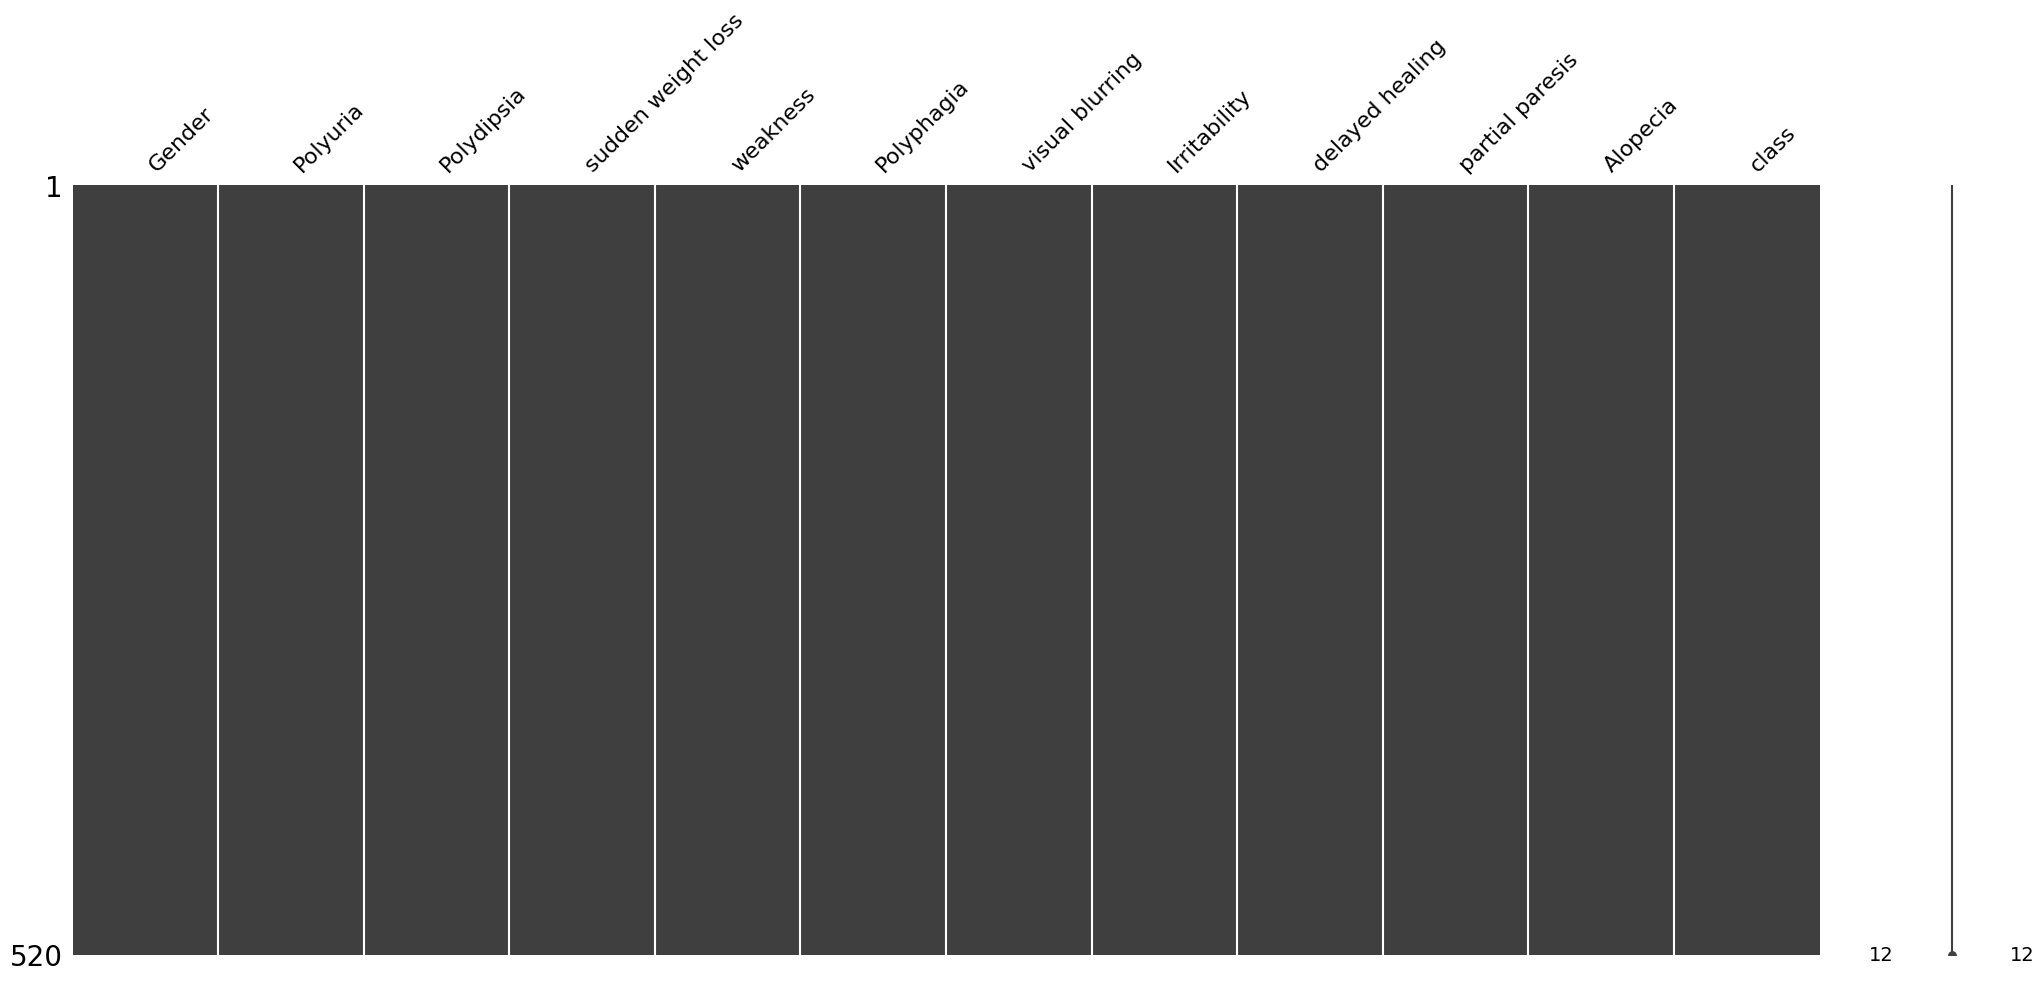

In [ ]:
msno.matrix(data)

In [ ]:
from sklearn.model_selection import train_test_split

y=data["class"]
X = data.drop(columns=["class"])
X.head()
print(X.shape)
y = pd.get_dummies(y, drop_first=True)
y.head()
X.columns = X.columns.astype(str)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)



(520, 11)
(416, 11) (416, 1) (104, 11) (104, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
ks = [x for x in range(1, 15, 2)]

models = [KNeighborsClassifier(n_neighbors=k) for k in ks]

for model in models:
  print(f"k = {model.get_params()['n_neighbors']}")
  model.fit(Xtrain, ytrain)
  y_pred = model.predict(Xtest)
  print(classification_report(ytest, y_pred))

k = 1
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.97      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

k = 3
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.96      0.92      0.94        71

    accuracy                           0.91       104
   macro avg       0.89      0.91      0.90       104
weighted avg       0.92      0.91      0.91       104

k = 5
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.96      0.93      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.92      0.91       104
weighted avg       0.92      0.92      0.92       104

k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.94      0.90      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.89      0.88       104
weighted avg       0.90      0.89      0.90       104



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
